In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/MCM/data

/content/drive/MyDrive/MCM/data


In [ ]:
!ls

7_56.xlsx			  Problem_C_Data_Wordle.xlsx
all_five_letter.txt		  roberta.large
aoa.xlsx			  roberta.large.tar.gz
clean_data.xlsx			  roberta.large.tar.gz.1
data_label_kmeans_3.xlsx	  temp_all.csv
new.xlsx			  test.csv
nlp.csv				  timeseries_nlp.csv
nlp_features_data.csv		  WordDifficulty.csv
Problem_C_Data_Wordle_label.xlsx  wordle_answer.txt


In [ ]:
!cd ./drive/MyDrive/MCM/data

/bin/bash: line 0: cd: ./drive/MyDrive/MCM/data: No such file or directory


In [14]:
data = pd.read_csv('nlp.csv').drop(columns='Unnamed: 0')
data.head()

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,...,short_3,short_4,short_5,all_1,all_2,all_3,all_4,all_5,ratio,ie
0,12/31/2022,560,manly,20380,1899,0,2,17,37,29,...,184,669,1418,8,151,1142,4771,8782,0.093180,0
1,12/30/2022,559,molar,21204,1973,0,4,21,38,26,...,137,702,1459,12,93,957,4813,8979,0.093048,0
2,12/29/2022,558,havoc,20001,1919,0,2,16,38,30,...,64,544,1696,0,15,449,3937,10453,0.095945,0
3,12/28/2022,557,impel,20160,1937,0,3,21,40,25,...,77,524,1703,1,20,372,3681,10780,0.096081,0
4,12/26/2022,555,judge,20011,2043,0,2,8,16,26,...,68,617,1606,6,40,389,3552,10867,0.102094,0


In [15]:
# data = data[['word_format',
#        'max_word_repetition', 'diff_score', 'syllable', 'brown_freq',
#        'reuters_freq', 'label', 'Length', 'Freq_HAL', 'Log_Freq_HAL',
#        'I_Mean_RT', 'I_Zscore', 'I_SD', 'Obs', 'I_Mean_Accuracy', 'f', 'g',
#        'j', 'm', 'p', 'q', 'v', 'w', 'x', 'z', 'oo', 'ir', 'ph', 'ly', 've',
#        'wh', 'sk', 'ch', 'ck', 'ng', 'qu', 'th', 'label2', 'label3', 'short_1',
#        'short_2', 'short_3', 'short_4', 'short_5', 'all_1', 'all_2', 'all_3',
#        'all_4', 'all_5', 'ratio', 'ie']]
X_data = data[['word_format',
       'max_word_repetition', 'diff_score', 'syllable', 'brown_freq',
       'reuters_freq', 'Freq_HAL', 'Log_Freq_HAL',
       'I_Mean_RT', 'I_Zscore', 'I_SD', 'Obs', 'I_Mean_Accuracy', 'f', 'g',
       'j', 'm', 'p', 'q', 'v', 'w', 'x', 'z', 'oo', 'ir', 'ph', 'ly', 've',
       'wh', 'sk', 'ch', 'ck', 'ng', 'qu', 'th','ie','short_1',
       'short_2', 'short_3', 'short_4', 'short_5', 'all_1', 'all_2', 'all_3',
       'all_4', 'all_5']]
y_data = data['ratio']

In [16]:
test = pd.read_csv('test.csv').drop(columns='Unnamed: 0')
test.head()

,Word,word_format,max_word_repetition,diff_score,syllable,brown_freq,reuters_freq,Length,Freq_HAL,Log_Freq_HAL,...,short_2,short_3,short_4,short_5,all_1,all_2,all_3,all_4,all_5,ie
0,eerie,11231,3,1,2,2,0,5,772,6.65,...,12,151,833,1312,2,79,987,4659,9127,1


In [17]:
test_X = test[['word_format',
       'max_word_repetition', 'diff_score', 'syllable', 'brown_freq',
       'reuters_freq',  'Freq_HAL', 'Log_Freq_HAL',
       'I_Mean_RT', 'I_Zscore', 'I_SD', 'Obs', 'I_Mean_Accuracy', 'f', 'g',
       'j', 'm', 'p', 'q', 'v', 'w', 'x', 'z', 'oo', 'ir', 'ph', 'ly', 've',
       'wh', 'sk', 'ch', 'ck', 'ng', 'qu', 'th','ie','short_1',
       'short_2', 'short_3', 'short_4', 'short_5', 'all_1', 'all_2', 'all_3',
       'all_4', 'all_5']]
test_X

,word_format,max_word_repetition,diff_score,syllable,brown_freq,reuters_freq,Freq_HAL,Log_Freq_HAL,I_Mean_RT,I_Zscore,...,short_1,short_2,short_3,short_4,short_5,all_1,all_2,all_3,all_4,all_5
0,11231,3,1,2,2,0,772,6.65,798.48,0.12,...,0,12,151,833,1312,2,79,987,4659,9127


In [18]:
X_data.shape

(328, 46)

In [19]:
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.multioutput import MultiOutputRegressor

X = X_data
# vector with target values
y = y_data


In [20]:
#use only last stable values
X = X.iloc[:-220,:]
y = y.iloc[:-220]
print(X.shape,y.shape)

(108, 46) (108,)


In [21]:
from sklearn import ensemble
# Splitting
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.1, random_state = 123)
# train_X, test_X, train_y, test_y = X.iloc[:30,:], X.iloc[30:,:], y.iloc[:30,:], y.iloc[30:,:]

print(f"{train_X.shape[0]} train samples with {train_X.shape[1]} columns")
print(f"{test_X.shape[0]} test samples with {test_X.shape[1]} columns")

# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',#'reg:linear','reg:squarederror'
                  n_estimators = 100, seed = 0, reg_lambda=0.1, reg_alpha=0.1)

# xgb_r = ensemble.RandomForestRegressor(n_estimators=10, criterion = "squared_error") #{“squared_error”, “absolute_error”, “friedman_mse”, “poisson”}
# Fitting the model
xgb_r.fit(train_X, train_y)
  
# Predict the model
pred = xgb_r.predict(test_X)


# pred = pred/np.sum(pred,axis=1).repeat(7,axis=0).reshape(30,7)*100

# print(pred)
# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))
print(np.array(test_y[20:30]))
print(pred[20:30])

97 train samples with 46 columns
11 test samples with 46 columns
RMSE :  0.002649
[]
[]


In [23]:
pred = xgb_r.predict(train_X)
print(train_X.shape)
result = train_X.merge(data)
result = result[['Word']]
result['type'] = 'train'
print(result.shape)
result['pred'] = pred
result['label'] = train_y
print(result.shape)
print(result.head())
rmse = np.sqrt(MSE(train_y, pred))
print("RMSE : % f" %(rmse))

(97, 46)
(97, 2)
(97, 4)
    Word   type      pred     label
0  manly  train  0.095004  0.093180
1  vigor  train  0.095493  0.093048
2  exist  train  0.096659  0.095945
3  judge  train  0.097691  0.096081
4  denim  train  0.095004  0.102094
RMSE :  0.002495


In [24]:
pred = xgb_r.predict(test_X)
print(test_X.shape)
result2 = test_X.merge(data)
result2 = result2[['Word']]
result2['type'] = 'test'
print(result2.shape)
result2['pred'] = pred
result2['label'] = test_y.values
print(result2.shape)
print(result2.head())
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

(11, 46)
(11, 2)
(11, 4)
    Word  type      pred     label
0  soggy  test  0.095597  0.093206
1  theme  test  0.095004  0.090420
2  grate  test  0.095004  0.093877
3  valet  test  0.095493  0.095539
4  grove  test  0.095493  0.097566
RMSE :  0.002649


In [25]:
final_result = pd.concat([result, result2], axis=0)
print(final_result.shape)
print(final_result.tail())
final_result.to_csv('question1b_result.csv')

(108, 4)
     Word  type      pred     label
6   chord  test  0.095004  0.093481
7   sneak  test  0.095004  0.094463
8   baker  test  0.095004  0.099351
9   excel  test  0.098423  0.099268
10  extra  test  0.097045  0.100424


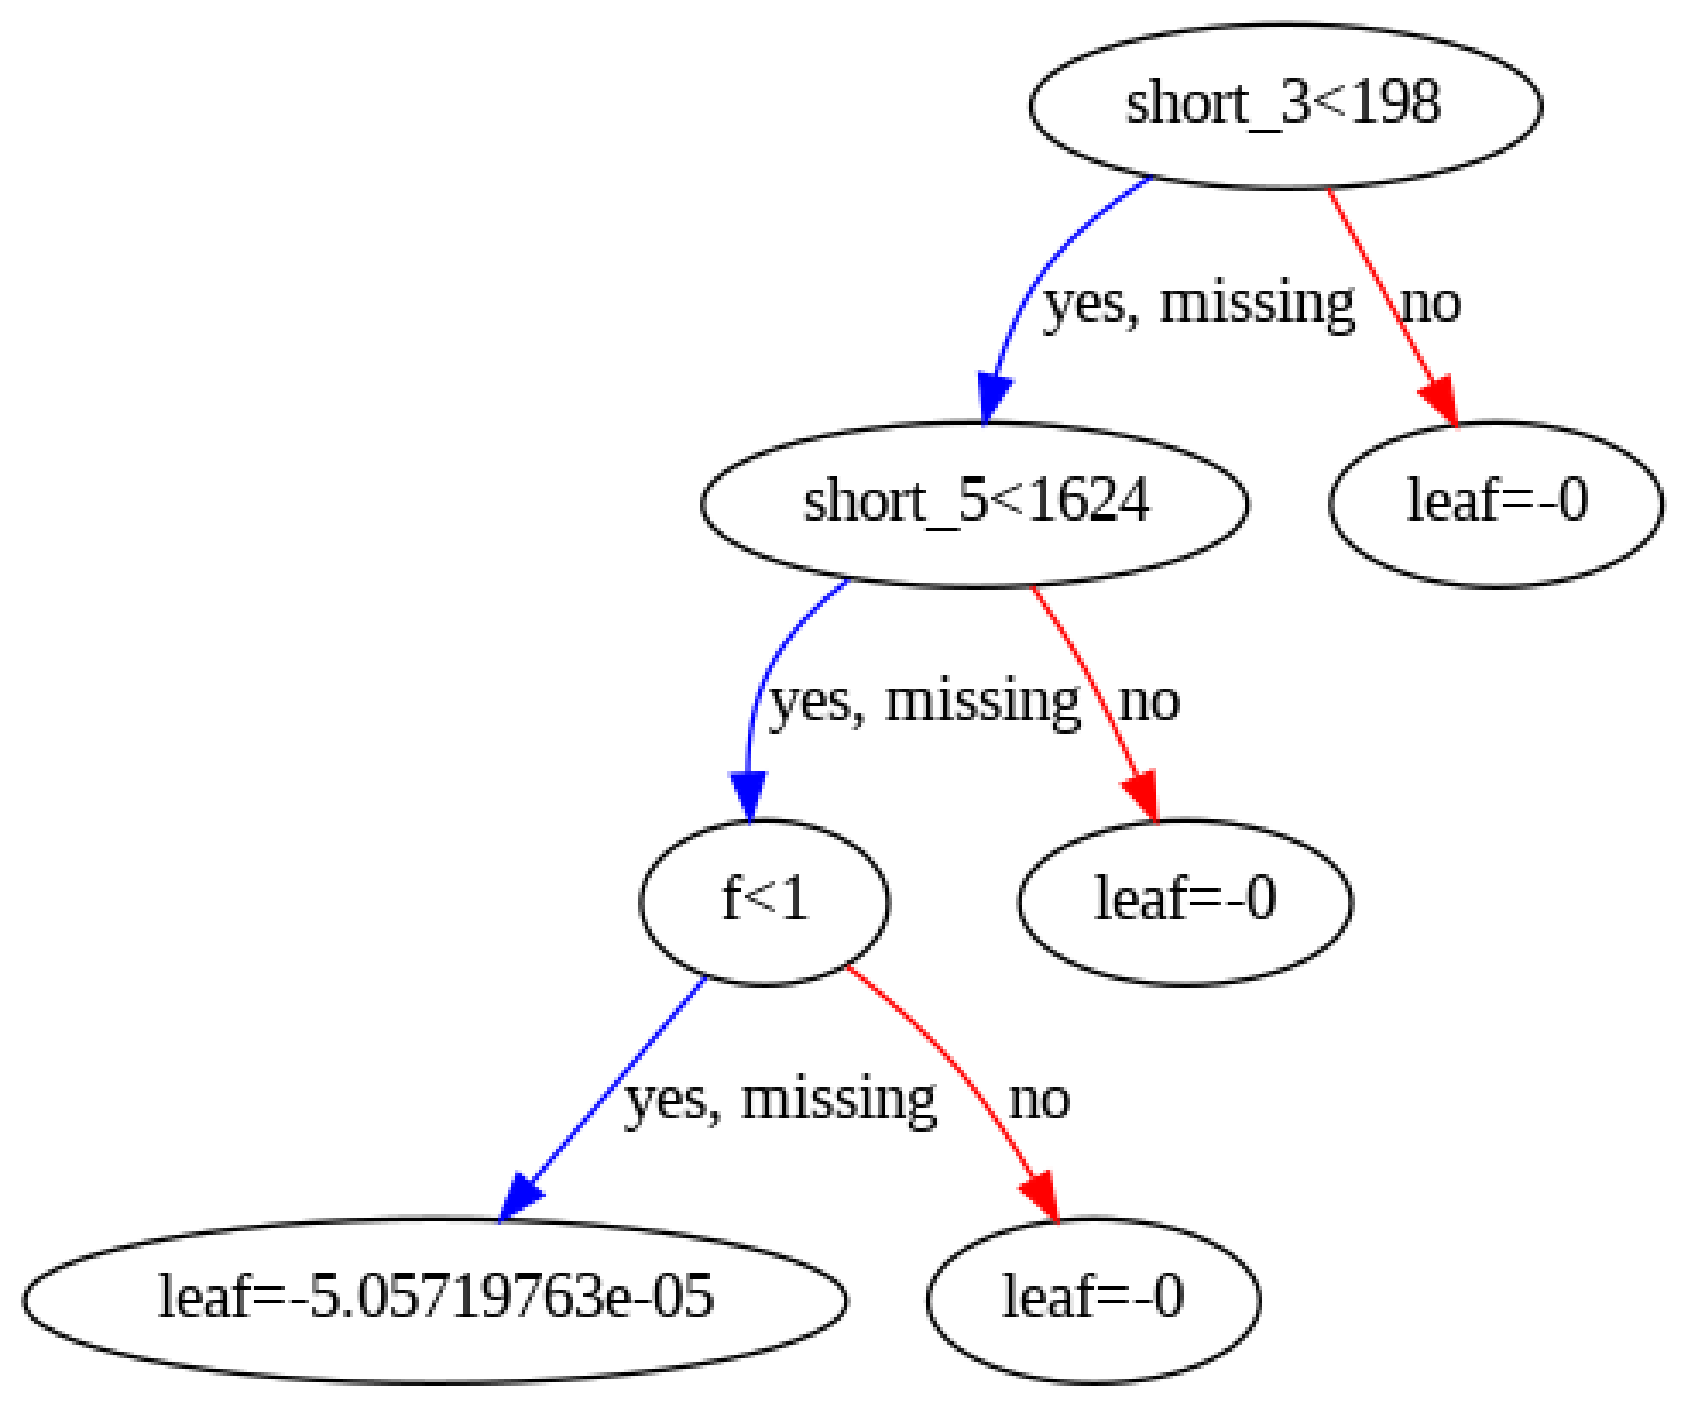

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(xgb_r, num_trees=70, ax=ax)
plt.show()

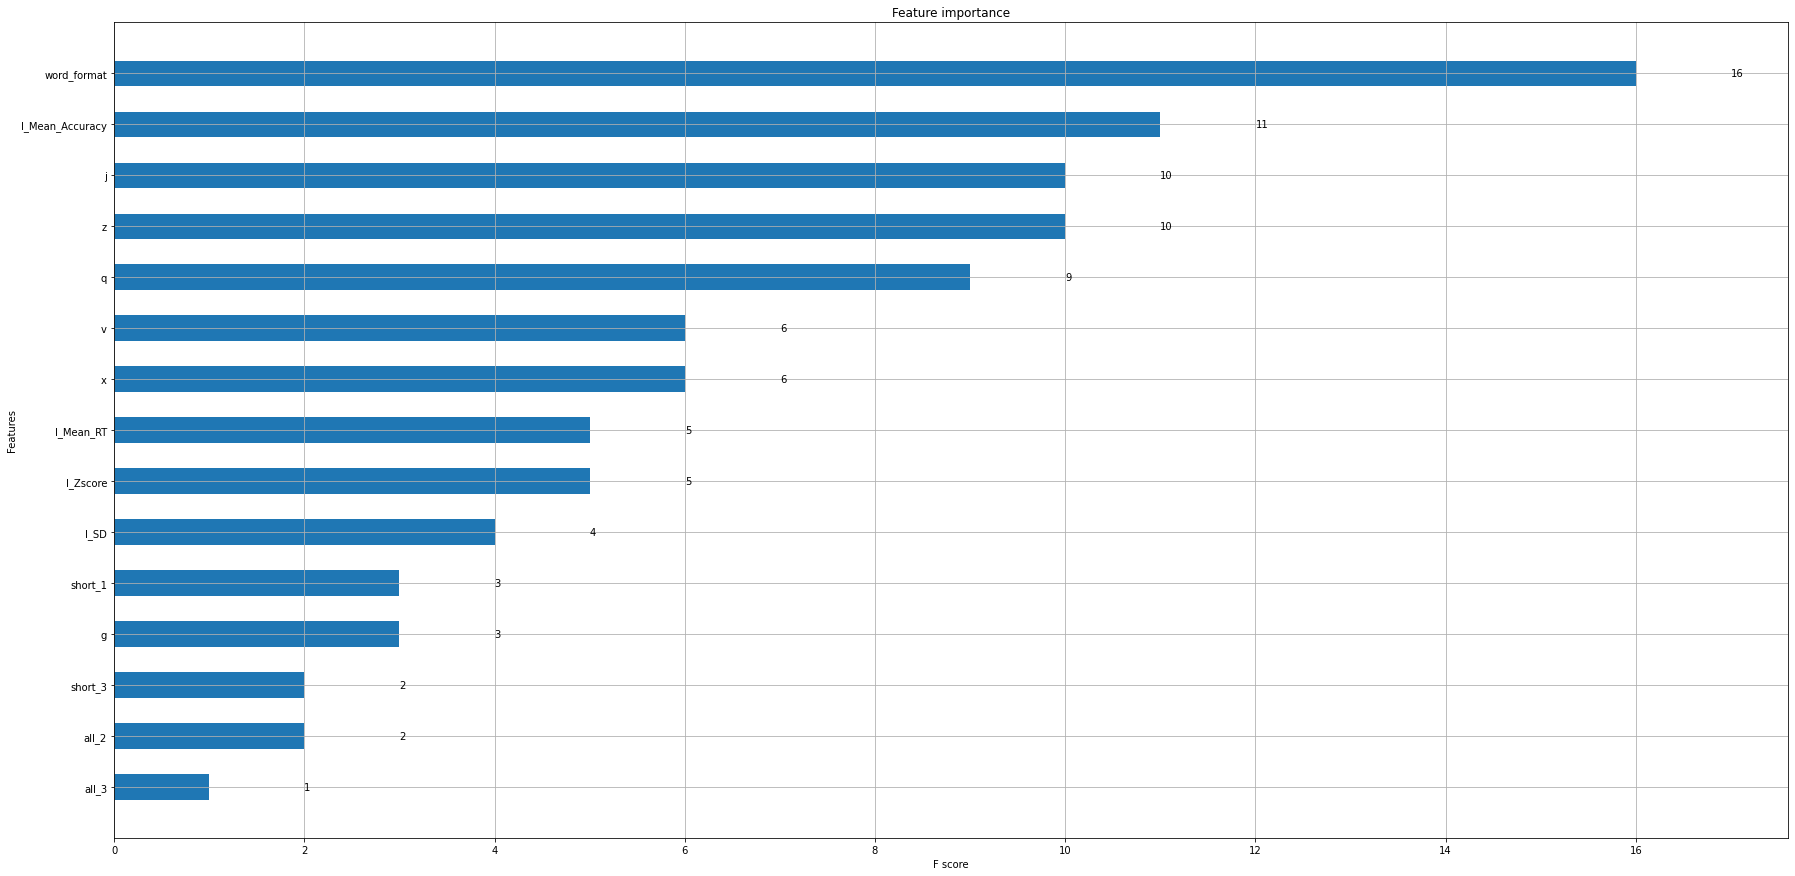

In [12]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(30, 15))
plot_importance(xgb_r,height=0.5,ax=ax,max_num_features=20)
plt.show()
my = xgb_r.feature_importances_[:20]


In [ ]:
top_20 = ['word_format', 'syllable', 'brown_freq', 'reuters_freq', 'Freq_HAL', 
       'I_Mean_RT', 'I_Zscore', 'I_SD', 'Obs', 'I_Mean_Accuracy',  'short_1',
       'short_2', 'short_3', 'short_4', 'short_5', 'all_1', 'all_2', 'all_3',
       'all_4', 'all_5']
print(len(top_20))

20


In [26]:
test_data = test[['word_format',
       'max_word_repetition', 'diff_score', 'syllable', 'brown_freq',
       'reuters_freq',  'Freq_HAL', 'Log_Freq_HAL',
       'I_Mean_RT', 'I_Zscore', 'I_SD', 'Obs', 'I_Mean_Accuracy', 'f', 'g',
       'j', 'm', 'p', 'q', 'v', 'w', 'x', 'z', 'oo', 'ir', 'ph', 'ly', 've',
       'wh', 'sk', 'ch', 'ck', 'ng', 'qu', 'th','ie','short_1',
       'short_2', 'short_3', 'short_4', 'short_5', 'all_1', 'all_2', 'all_3',
       'all_4', 'all_5']]
print(test_data)
test_ratio = xgb_r.predict(test_data)
test_ratio

   word_format  max_word_repetition  diff_score  syllable  brown_freq  \
0        11231                    3           1         2           2   

   reuters_freq  Freq_HAL  Log_Freq_HAL  I_Mean_RT  I_Zscore  ...  short_1  \
0             0       772          6.65     798.48      0.12  ...        0   

   short_2  short_3  short_4  short_5  all_1  all_2  all_3  all_4  all_5  
0       12      151      833     1312      2     79    987   4659   9127  

[1 rows x 46 columns]


array([0.10227332], dtype=float32)